In [ ]:
import os

os.system("pip install -r requirements.txt")
print("Librerías instaladas.")

# Dataset

In [24]:
import seaborn as sns
import pandas as pd

# Cargamos dataset MPG
data = sns.load_dataset('mpg').dropna()

# Definimos las Características y la Variable Objetivo
X = data[['weight', 'horsepower']]  # Características
y = data['mpg']                     # Objetivo (miles per gallon)

df = X.copy()
df['MPG'] = y

df

,weight,horsepower,MPG
0,3504,130.0,18.0
1,3693,165.0,15.0
2,3436,150.0,18.0
3,3433,150.0,16.0
4,3449,140.0,17.0
...,...,...,...
393,2790,86.0,27.0
394,2130,52.0,44.0
395,2295,84.0,32.0
396,2625,79.0,28.0


In [25]:
from sklearn.model_selection import train_test_split

# Particionamos el dataset en porporción 20/80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Muestras de entrenamiento: {len(X_train)}")
print(f"Muestras de prueba: {len(X_test)}")

Muestras de entrenamiento: 313
Muestras de prueba: 79


# Regresión Lineal (Scikit-Learn)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Inicializamos el modelo de regresión lineal y se entrena
model = LinearRegression()
model.fit(X_train, y_train)

# Obtenemos las predicciones
y_pred = model.predict(X_test)

# Evaluamos los resultados
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Scikit-learn MSE: {mse:.2f}")
print(f"Scikit-learn R2: {r2:.2f}")

Scikit-learn MSE: 17.79
Scikit-learn R2: 0.65


# Regresion Lineal (Ecuaciones Normales)

In [21]:
import numpy as np

# Añadimos una columna de unos al principio,
# la cual nos proporcionará el intercepto de la recta.
X_train_np = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_np = np.c_[np.ones(X_test.shape[0]), X_test]

# Se calculan los coeficientes usando las ecuaciones normales.
beta = np.linalg.inv(X_train_np.T @ X_train_np) @ X_train_np.T @ y_train

# Obtenemos las predicciones
y_pred_manual = X_test_np @ beta

# Evaluamos los resultados
mse_manual = mean_squared_error(y_test, y_pred_manual)
r2_manual = r2_score(y_test, y_pred_manual)

print(f"Manual MSE: {mse_manual:.2f}")
print(f"Manual R2: {r2_manual:.2f}")

Manual MSE: 17.79
Manual R2: 0.65


# Visualization

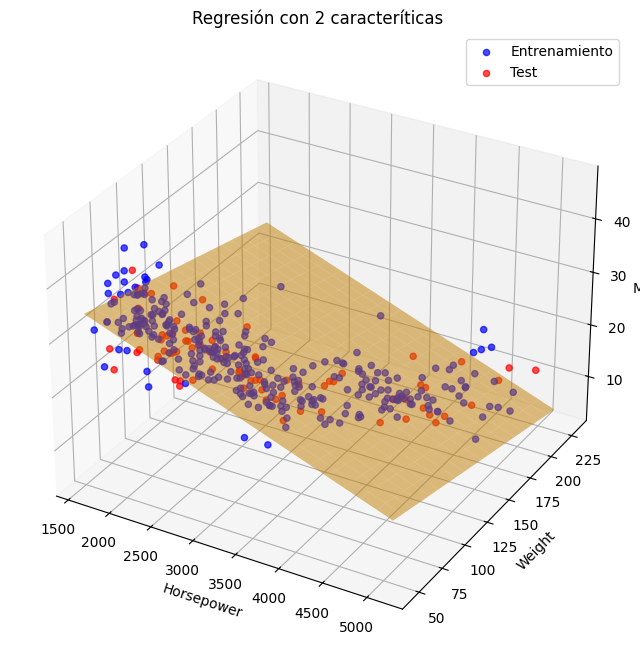

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

X_train_3d = X_train[['weight', 'horsepower']].values
X_test_3d = X_test[['weight', 'horsepower']].values

x1_range = np.linspace(X_train_3d[:, 0].min(), X_train_3d[:, 0].max(), 20)
x2_range = np.linspace(X_train_3d[:, 1].min(), X_train_3d[:, 1].max(), 20)
x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
y_pred_plane = (model.intercept_ +
                model.coef_[0] * x1_mesh +
                model.coef_[1] * x2_mesh)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_3d[:, 0], X_train_3d[:, 1], y_train, color='blue', label='Entrenamiento', alpha=0.7)

ax.scatter(X_test_3d[:, 0], X_test_3d[:, 1], y_test, color='red', label='Test', alpha=0.7)

ax.plot_surface(x1_mesh, x2_mesh, y_pred_plane, color='orange', alpha=0.5)

ax.set_xlabel('Horsepower')
ax.set_ylabel('Weight')
ax.set_zlabel('MPG')
ax.set_title('Regresión con 2 caracteríticas')
ax.legend()

plt.show()